# Task 6.5: Spotify-- Unsupervised Machine Learning: Clustering

Contents:

1. Importing libraries and data

2. The elbow technique

3. k-means clustering

## 1.Importing Libraries & Data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Create a shortcut for project folder path as a string.
path = r'/Users/cboyd/Documents/05-2022 Spotify Analysis'

In [5]:
# Import the “Final database_clean.pkl” data set into your notebook using the os library.
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final database_clean.pkl'))

In [6]:
df.columns

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)

In [7]:
df.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [8]:
df.shape

(170633, 151)

In [9]:
#Reduce DF to only quantitative columns necessary for clustering

df_cluster = df[['Top50_dummy','Popularity']]

## 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] 

score

[-29353079030488.31,
 -9726383873855.527,
 -4836448117666.154,
 -2876110960083.081,
 -1917022543258.0493,
 -1360012743137.2012,
 -1015865065035.2821,
 -782122005545.4424,
 -619485613924.9904]

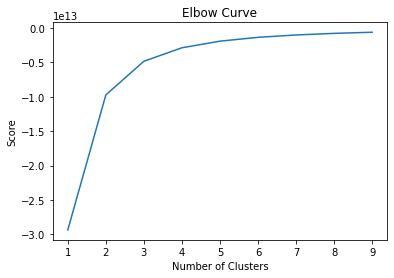

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### A large jump is seen from two to three on the x-axis, but after this jump the curve straightens out. This implies that the optimal count for the clusters is three.

## 3. K-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

KMeans(n_clusters=3)

In [17]:
df_cluster.head()

,Top50_dummy,Popularity
0,1.0,31833.95
1,0.0,8.00
2,1.0,76924.40
3,0.0,849.60
4,1.0,20739.10


In [18]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

/var/folders/9g/8yvgvw1x2d769tcx740vybk00000gn/T/ipykernel_1188/2810219287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [19]:
df_cluster['clusters'].value_counts()

0    150954
1     16319
2      3360
Name: clusters, dtype: int64

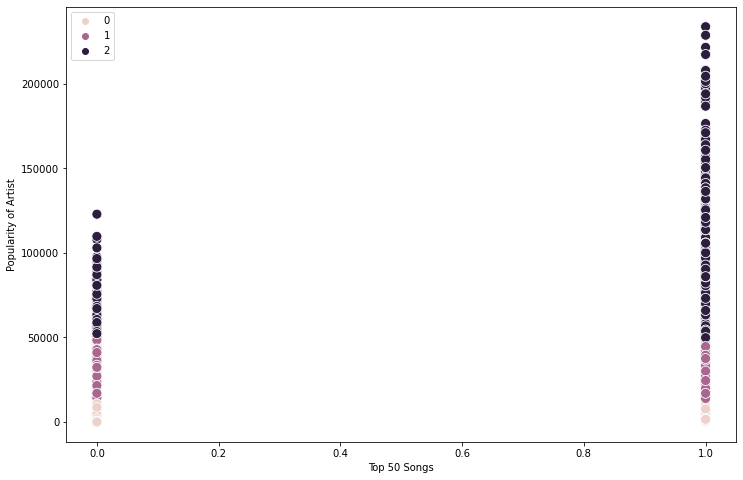

In [20]:
# Plot the clusters for the "Top50_dummy" and "Popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Top50_dummy'], y=df_cluster['Popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Top 50 Songs') # Label x-axis.
plt.ylabel('Popularity of Artist') # Label y-axis.
plt.show()

In [21]:
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/9g/8yvgvw1x2d769tcx740vybk00000gn/T/ipykernel_1188/2821637660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'


In [22]:
#Calculate decriptive statistics of clusters

df_cluster.groupby('cluster').agg({'Top50_dummy':['mean', 'median'], 
                                   'Popularity':['mean', 'median']})

Top50_dummy           Popularity          
                   mean median          mean    median
cluster                                               
dark purple    0.977083    1.0  73661.085283  65436.30
pink           0.214648    0.0   1695.549679    336.15
purple         0.896195    1.0  25796.486503  23286.65

#### Cluster 2 is the most populated cluster & the dark purple seems to have the best statistics. From the clustering, it looks like there is a higher chance of being in the Top 50 songs when the artist is more popular.

#### These results could be useful for future steps of an analytics project when understanding which artists are most popular in each of the counties and if they change or stay the same in each country.

In [23]:
df_cluster.to_excel(r'/Users/cboyd/Documents/05-2022 Spotify Analysis/02 Data/Prepared Data/World_Spotify_chartdata.xlsx')